In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/CFE_gradients/code')
import load_tools

In [2]:
ms = [0.1, 0.25, 0.5, 0.75, 1]
L = 500
n = '1e-4'
grad_dim = 1
nmocks = 401

In [3]:
stds = np.zeros((len(ms), 4))
for i, m in enumerate(ms):
    amps = load_tools.load_suave_amps(L, n, grad_dim, m, nmocks=nmocks)
    stds[i] = np.std(amps, axis=0)

In [5]:
Ls = [500, 750, 1000, 1500]
m = 1
n = '1e-4'
grad_dim = 1
nmocks = 334

stds_Ls = np.zeros((len(Ls), 4))
for i, L in enumerate(Ls):
    amps = load_tools.load_suave_amps(L, n, grad_dim, m, nmocks=nmocks)
    stds_Ls[i] = np.std(amps, axis=0)

Text(0.5, 0.98, 'Precision of gradient recovery: L1500 n1e-4, 334 mocks')

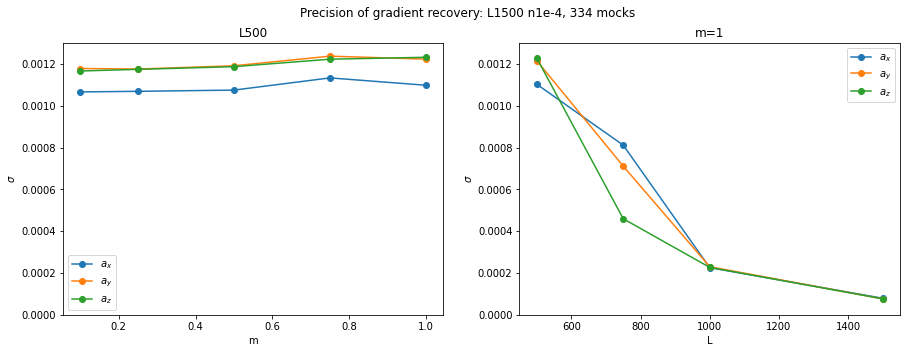

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

comps = ['x', 'y', 'z']
for i in range(3):
    axs[0].plot(ms, stds[:,1+i], marker='o', label=f'$a_{comps[i]}$')
    axs[1].plot(Ls, stds_Ls[:,1+i], marker='o', label=f'$a_{comps[i]}$')
axs[0].set_xlabel('m')
axs[0].set_title('L500')
axs[1].set_xlabel('L')
axs[1].set_title('m=1')

for ax in axs:
    ax.set_ylim((0, 0.0013))
    ax.set_ylabel('$\sigma$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.legend()
fig.suptitle(f'Precision of gradient recovery: L{L} n{n}, {nmocks} mocks')